In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [5]:
df = pd.read_csv("wine.csv")
df1 = df.iloc[:,1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
!pip install dtale


     ---------------------------------------- 12.8/12.8 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 62.3/62.3 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.9/65.9 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 943.1/943.1 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 216.1/216.1 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 98.9/98.9 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 642.7/642.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     -------------------------------------- 383.4/383.4 kB 6.0 MB/s eta 0:00:00
  Created wh

In [9]:
import dtale
eda = dtale.show(df1)
eda

C:\Users\Vanshika\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:

4.0.0-unsupported is an invalid version and will not be supported in a future release



C:\Users\Vanshika\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:

4.0.0-unsupported is an invalid version and will not be supported in a future release



In [11]:
df_norm  = StandardScaler().fit_transform(df1)
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
import matplotlib as mpt
mpt.use('tkagg')

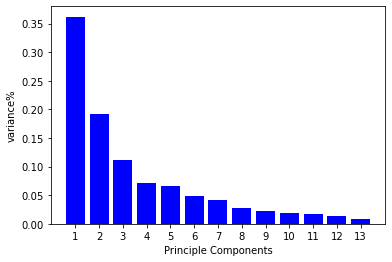

In [14]:
%matplotlib inline
pca = PCA(n_components=13)
principleComponents = pca.fit_transform(df_norm)
PC = range(1,pca.n_components_+1)
plt.bar(PC,pca.explained_variance_ratio_,color = 'blue')
plt.xlabel('Principle Components')
plt.ylabel("variance%")
plt.xticks(PC)
plt.show()

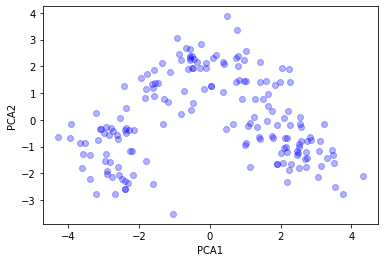

In [23]:
PCA_components = pd.DataFrame(principleComponents)
plt.scatter(PCA_components[0],PCA_components[1],alpha =.3,color = 'blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

2022-10-11 21:18:27,400 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


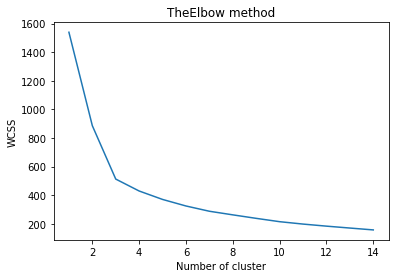

In [27]:
wcss =[]

for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init ='k-means++',random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)
%matplotlib inline
plt.plot(range(1,15),wcss)
plt.title('TheElbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [28]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3)

In [29]:
labels = model.predict(PCA_components.iloc[:,:2])

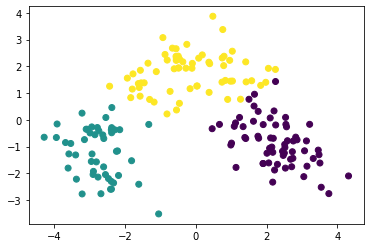

In [30]:
plt.scatter(PCA_components[0],PCA_components[1],c =labels)
plt.show()

In [31]:
k_new_df = pd.DataFrame(principleComponents[:,0:2])

In [32]:
model_k = KMeans(n_clusters=3)
model_k.fit(k_new_df)

KMeans(n_clusters=3)

In [35]:
model_k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [36]:
md = pd.Series(model_k.labels_)
df1['clust']=md
k_new_df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [37]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.562500
2,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846


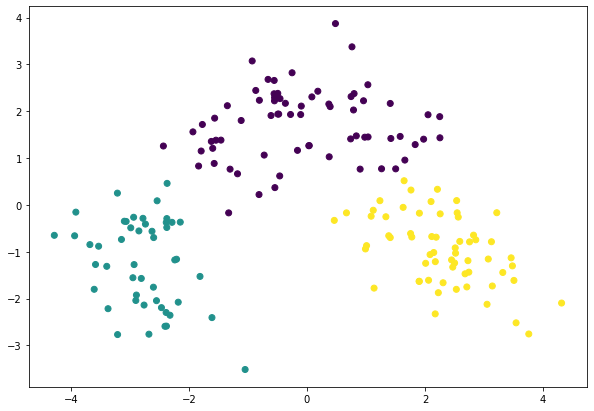

In [39]:
model2 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage = 'ward')
h_cluster = model2.fit(PCA_components.iloc[:,:2])
labels2 = model2.labels_
X = PCA_components.iloc[:,:1]
Y = PCA_components.iloc[:,1:2]
plt.figure(figsize=(10,7))
plt.scatter(X,Y,c=labels2)
plt.show()

In [40]:
h_new_df = pd.DataFrame(principleComponents[:,0:2])
h_new_df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


2022-10-11 21:28:25,204 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


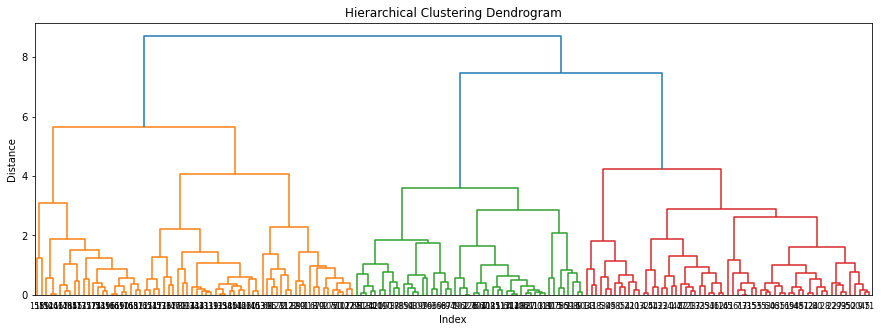

In [41]:
hcf = linkage(h_new_df,method="complete",metric="euclidean")
%matplotlib inline
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    hcf,
    leaf_rotation=0.,
    leaf_font_size=8.,
)
plt.show()

In [42]:
h_complete = AgglomerativeClustering(n_clusters = 5,linkage='complete',affinity="euclidean").fit(h_new_df)
h_complete.labels_

array([4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [43]:
cluster_labels=pd.Series(h_complete.labels_)
df1['clust']=cluster_labels
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


In [44]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.686222,2.924000,2.380667,20.966667,95.000000,1.691556,1.088222,0.469556,1.090889,4.613556,0.824578,2.021111,571.444444
1,13.420435,3.390435,2.486087,21.847826,103.130435,1.777391,0.897826,0.428696,1.406522,9.203043,0.640000,1.640870,654.782609
2,12.238163,1.713061,2.165714,19.528571,92.061224,2.395510,2.204694,0.318163,1.713061,2.992653,1.096327,2.913265,509.755102
3,13.573265,2.016531,2.481429,18.069388,107.795918,2.758571,2.887551,0.296122,1.868980,5.175510,1.065510,3.166939,1055.551020
4,14.150000,1.963333,2.435000,15.150000,109.500000,3.248333,3.505833,0.276667,2.185000,6.735000,1.055833,3.188333,1289.333333


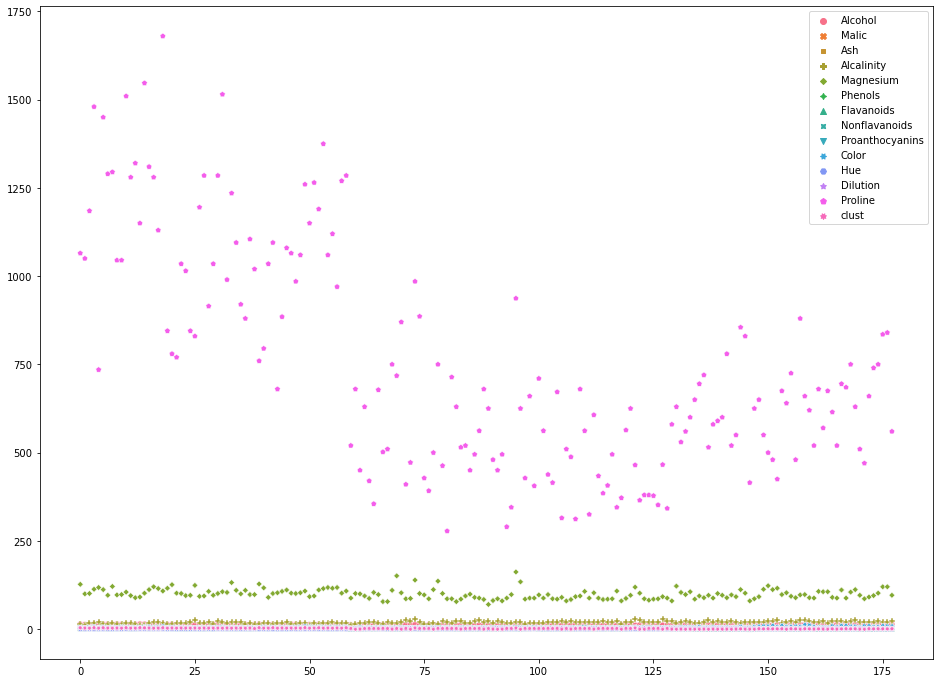

In [45]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=df1)
plt.show()